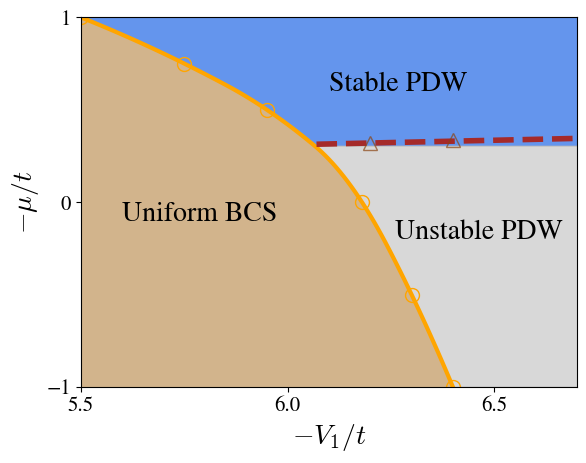

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

matplotlib.rcParams["mathtext.fontset"]="cm";
matplotlib.rcParams["font.family"]="STIXGeneral";

#x = np.array([5.5, 5.75, 5.95, 6.1, 6.18,6.3,6.4])
#y = np.array([1,   0.75, 0.5,  0.25,0.0 ,  -0.5, -1 ])

x = np.array([5.5, 5.75, 5.95, 6.18,6.3,6.4])
y = np.array([1,   0.75, 0.5, 0.0 ,  -0.5, -1 ])


plt.plot(x, y, "o",markersize=10,color="orange",fillstyle="none")

# Create the cubic spline interpolation
cs = interp1d(x, y, kind='quadratic')

x_smooth = np.linspace(min(x), max(x), 100)

plt.plot(x_smooth, cs(x_smooth), label='First Order Transition',linewidth=3,linestyle="solid",color="orange");

###
Triangle_x=np.array([6.2,6.4])
Triangle_y=np.array([0.32,0.335])

boundary_N=np.arange(6.07,6.8,0.01)
slope=0.05;
plt.plot(boundary_N, (boundary_N-6.0)*slope+0.31,color="brown",linestyle="dashed",linewidth=4)
plt.plot(Triangle_x, Triangle_y, '^', label=r"$n_x=0$",markersize=10,alpha=0.7,color="saddlebrown",fillstyle="none")

plt.xlim([5.5,6.7]);
plt.ylim([-1,1])


##
plt.xlabel(r"$-V_1/t$",fontsize=20)

plt.ylabel(r"$-\mu/t$",fontsize=20)

plt.text(5.6,-0.1,"Uniform BCS",fontsize=20)

plt.text(6.1,0.6,"Stable PDW",fontsize=20)

plt.text(6.26,-0.2,"Unstable PDW",fontsize=20)

plt.xticks([5.5,6.0,6.5],fontsize=15)
plt.yticks([-1,0,1],fontsize=15)


### Fill 1
XORange=np.linspace(5.5,6.4,100);Boundary1=cs(XORange);

plt.fill_between(XORange,-1,  Boundary1,color='tan', alpha=1, label='PDW')

### Fill 2
Another_xxx=np.linspace(6.062,5.5,100);Partboundary1=cs(Another_xxx);
Lefty=np.concatenate([Partboundary1   ])
merge_x=np.concatenate([Another_xxx   ])
plt.fill_betweenx(Lefty,merge_x,  merge_x*0+6.8,color='cornflowerblue', alpha=1, label='PDW')

## Fill 3
px=np.linspace(6.4,6.065,100);py=cs(px);
plt.fill_betweenx(py,px,  px*0+6.8,color='gray', alpha=0.3, label='PDW')

plt.savefig("fig1.pdf", bbox_inches='tight')